In [2]:
import os
import sys

import pandas as pd
import numpy as np
from drawdata import draw_scatter

from matplotlib import pyplot as plt

In [3]:
draw_scatter()

In [4]:
class LogisticRegression():
    def __init__(self, lr, epoch):
        self.X_train = None
        self.y_train = None
        self.lr = lr
        self.epoch = epoch
        self.weights = np.array([[np.random.rand()], [np.random.rand()], [np.random.rand()]])

    def grad_negative_theta_0(self, X_sample, z):
        return 1. - 1./(np.exp(z) + 1)

    def grad_negative_theta_1(self, X_sample, z):
        x1 = X_sample[0][1]
        return x1 - x1/(np.exp(z) + 1)

    def grad_negative_theta_2(self, X_sample, z):
        x2 = X_sample[0][2]
        return x2 - x2/(np.exp(z) + 1)

    def grad_positive_theta_0(self, X_sample, z):
        return -1./(np.exp(z) + 1)

    def grad_positive_theta_1(self, X_sample, z):
        x1 = X_sample[0][1]
        return -x1/(np.exp(z) + 1)

    def grad_positive_theta_2(self, X_sample, z):
        x2 = X_sample[0][2]
        return -x2/(np.exp(z) + 1)

    def sigmoid(self, z):
        return 1./(1. + np.exp(-z))

    def run(self):
        losses = list()
        grads = list()
        
        positive = True

        for X_sample, y_sample in zip(self.X_train, self.y_train):
            if y_sample == 1:
                positive = True
            else:
                positive = False

            z = np.matmul(X_sample.reshape((1, 3)), self.weights).item()
            y_pred = self.sigmoid(z)

            if positive is True:
                # positive (y == 1) loss function
                positive_loss = -np.log(y_pred)
                losses.append(positive_loss)
                
                grad_pos_theta_0 = self.grad_positive_theta_0(X_sample.reshape((1, 3)), z)
                grad_pos_theta_1 = self.grad_positive_theta_1(X_sample.reshape((1, 3)), z)
                grad_pos_theta_2 = self.grad_positive_theta_2(X_sample.reshape((1, 3)), z)
                
                grads.append(
                    np.array([[grad_pos_theta_0], 
                              [grad_pos_theta_1], 
                              [grad_pos_theta_2]]))
                

            else:
                # vegative (y == 0) loss function
                negative_loss = -np.log(1.- y_pred)
                losses.append(negative_loss)
                
                grad_neg_theta_0 = self.grad_negative_theta_0(X_sample.reshape((1, 3)), z)
                grad_neg_theta_1 = self.grad_negative_theta_1(X_sample.reshape((1, 3)), z)
                grad_neg_theta_2 = self.grad_negative_theta_2(X_sample.reshape((1, 3)), z)
                
                grads.append(
                    np.array([[grad_neg_theta_0], 
                              [grad_neg_theta_1], 
                              [grad_neg_theta_2]]))
                
                
        self.weights = self.weights - self.lr * np.mean(np.stack(grads, axis=0), axis=0)
        cost = np.mean(np.array(losses))
        
        return cost
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        for i in range(self.epoch):
            cost = self.run()
            print(f"epoch: {i}, cost: {cost}, weights: {self.weights}")
    
    def predict(self, X_sample):
        z = np.matmul(X_sample.reshape((1, 3)), self.weights).item()
        y_pred = self.sigmoid(z)
        return y_pred

In [5]:
raw = pd.read_csv("data.csv")
raw.head()

,x,y,z
0,267.363025,433.231277,a
1,245.654990,423.758635,a
2,233.827184,448.033358,a
3,246.202526,374.593563,a
4,251.369154,393.773179,a


In [6]:
len(raw)

145

In [7]:
# show nulls
raw.isnull().sum()

x    0
y    0
z    0
dtype: int64

In [8]:
raw.describe(include='all')

,x,y,z
count,145.000000,145.000000,145
unique,NaN,NaN,2
top,NaN,NaN,b
freq,NaN,NaN,87
mean,432.027578,262.631495,NaN
std,164.513103,101.858520,NaN
min,132.765690,58.154437,NaN
25%,259.420456,177.651148,NaN
50%,500.219012,246.984035,NaN
75%,571.693708,367.924923,NaN


In [9]:
# number of elements belong to class "a"
print(len(raw.loc[raw['z'] == 'a']))

# number of elements belong to class "b"
print(len(raw.loc[raw['z'] == 'b']))

58
87


In [10]:
# round fp
np.around(raw['x'], 2)

0      267.36
1      245.65
2      233.83
3      246.20
4      251.37
        ...  
140    568.21
141    577.97
142    535.14
143    546.06
144    566.80
Name: x, Length: 145, dtype: float64

In [11]:
# Standard Scale of Data
# (data - mean)/std
x1_mean = np.mean(raw['x'])
x2_mean = np.mean(raw['y'])
x1_std = np.std(raw['x'])
x2_std = np.std(raw['y'])

In [12]:
train_data = pd.DataFrame()

In [13]:
train_data['x1'] = np.around((raw['x'] - x1_mean)/x1_std, 2)
train_data['x2'] = np.around((raw['y'] - x2_mean)/x2_std, 2)
train_data['y'] = raw['z'].map(lambda record: 1 if record=='a' else 0)

In [14]:
train_data.head()

,x1,x2,y
0,-1.00,1.68,1
1,-1.14,1.59,1
2,-1.21,1.83,1
3,-1.13,1.10,1
4,-1.10,1.29,1


In [15]:
train_data.describe(include='all')

,x1,x2,y
count,145.000000,145.000000,145.000000
mean,-0.000069,0.000483,0.400000
std,1.003451,1.003019,0.491596
min,-1.830000,-2.010000,0.000000
25%,-1.050000,-0.840000,0.000000
50%,0.420000,-0.150000,0.000000
75%,0.850000,1.040000,1.000000
max,1.400000,1.830000,1.000000


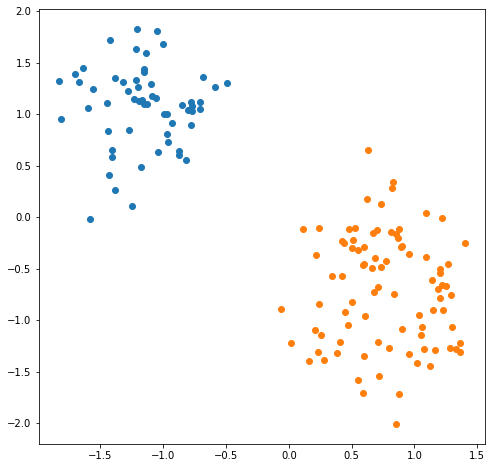

In [16]:
fig, axes = plt.subplots(1,1, figsize=(8, 8))
axes.scatter(train_data.loc[train_data['y']==1, 'x1'], train_data.loc[train_data['y']==1, 'x2'])
axes.scatter(train_data.loc[train_data['y']==0, 'x1'], train_data.loc[train_data['y']==0, 'x2'])

In [17]:
train_data.describe()

,x1,x2,y
count,145.000000,145.000000,145.000000
mean,-0.000069,0.000483,0.400000
std,1.003451,1.003019,0.491596
min,-1.830000,-2.010000,0.000000
25%,-1.050000,-0.840000,0.000000
50%,0.420000,-0.150000,0.000000
75%,0.850000,1.040000,1.000000
max,1.400000,1.830000,1.000000


In [18]:
train_data_shuffled = train_data.sample(frac=1)
train_data_shuffled.describe()

,x1,x2,y
count,145.000000,145.000000,145.000000
mean,-0.000069,0.000483,0.400000
std,1.003451,1.003019,0.491596
min,-1.830000,-2.010000,0.000000
25%,-1.050000,-0.840000,0.000000
50%,0.420000,-0.150000,0.000000
75%,0.850000,1.040000,1.000000
max,1.400000,1.830000,1.000000


In [19]:
train_data_shuffled['x0'] = 1.
X_train = train_data_shuffled[['x0', 'x1', 'x2']].values
y_train = train_data_shuffled[['y']].values.ravel()

In [20]:
params = [0.0015, 50]

logistic_regression = LogisticRegression(*params)
logistic_regression.fit(X_train, y_train)


epoch: 0, cost: 1.0354795955064038, weights: [[0.65778822]
 [0.90255287]
 [0.53127808]]
epoch: 1, cost: 1.034572187475781, weights: [[0.65741463]
 [0.90170916]
 [0.53199123]]
epoch: 2, cost: 1.0336657758496073, weights: [[0.65704112]
 [0.90086591]
 [0.53270391]]
epoch: 3, cost: 1.032760359881769, weights: [[0.65666768]
 [0.90002311]
 [0.53341611]]
epoch: 4, cost: 1.03185593882521, weights: [[0.65629432]
 [0.89918076]
 [0.53412785]]
epoch: 5, cost: 1.030952511931937, weights: [[0.65592103]
 [0.89833887]
 [0.53483911]]
epoch: 6, cost: 1.0300500784530244, weights: [[0.65554781]
 [0.89749743]
 [0.5355499 ]]
epoch: 7, cost: 1.0291486376386183, weights: [[0.65517466]
 [0.89665645]
 [0.53626022]]
epoch: 8, cost: 1.0282481887379435, weights: [[0.65480159]
 [0.89581592]
 [0.53697007]]
epoch: 9, cost: 1.0273487309993055, weights: [[0.65442859]
 [0.89497585]
 [0.53767945]]
epoch: 10, cost: 1.0264502636700976, weights: [[0.65405566]
 [0.89413623]
 [0.53838836]]
epoch: 11, cost: 1.0255527859968046,

In [21]:
# X_test = np.array([[1], [-1], [1]])
# X_test = np.array([[1], [1], [-1]])
X_test = np.array([[1], [0], [0.5]])
logistic_regression.predict(X_test)

0.7155322682854016

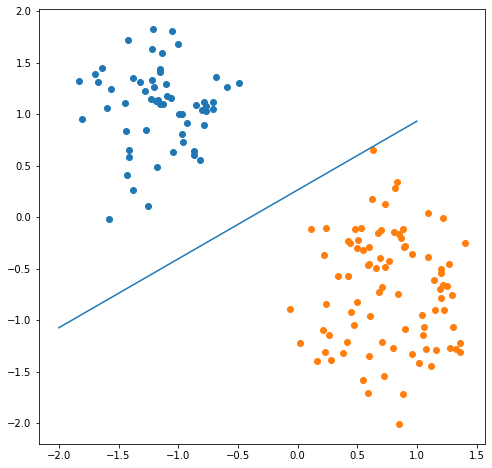

In [22]:
fig, axes = plt.subplots(1,1, figsize=(8, 8))
axes.scatter(train_data.loc[train_data['y']==1, 'x1'], train_data.loc[train_data['y']==1, 'x2'])
axes.scatter(train_data.loc[train_data['y']==0, 'x1'], train_data.loc[train_data['y']==0, 'x2'])

x_min, x_max = np.around(train_data['x1'].min()), np.around(train_data['x1'].max()) 
line_x = np.linspace(x_min, x_max, len(train_data['x1']))

c = - logistic_regression.weights[0] / logistic_regression.weights[2]
m = - logistic_regression.weights[1] / logistic_regression.weights[2]

axes.plot(line_x, m * line_x + c)